In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install category_encoders
!pip install graphviz

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree 
#import warning


# readind the data set

In [5]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_name = ['buying','maint' ,'doors','persons','lug_boot','safty','class']
df.columns = col_name
col_name

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty', 'class']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safty     1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.shape

(1727, 7)

In [9]:
col_name = ['buying','maint' ,'doors','persons','lug_boot','safty','class']

for col in col_name:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safty
['med' 'high' 'low']
safty
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [10]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: ylabel='count'>

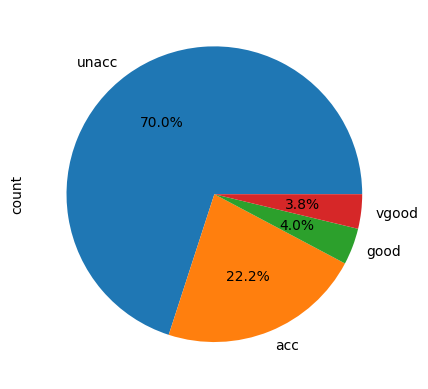

In [11]:
df['class'].value_counts().plot(kind ='pie',autopct = '%1.1f%%')

In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safty       0
class       0
dtype: int64

In [13]:
x =df.drop(['class'],axis=1)
y = df['class']

# encoding data

In [14]:
encoder =ce.OrdinalEncoder(cols=['buying','maint' ,'doors','persons','lug_boot','safty'])

x_en = encoder.fit_transform(x)

In [15]:
le =LabelEncoder()
y_en =le.fit_transform(y)

# split the data training and testing

In [16]:
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

In [17]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.8053 


In [19]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [20]:
classes_name =le.classes_.tolist()
classes_name 

['acc', 'good', 'unacc', 'vgood']

In [21]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


<Axes: >

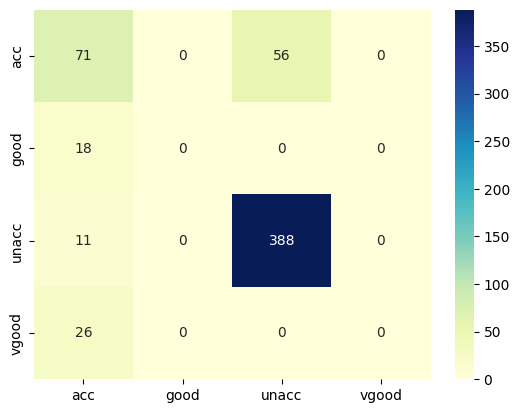

In [22]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [23]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
x =df.drop(['class'],axis=1)
y=df['class']
ran= RandomUnderSampler()
x_rs,y_rs=ran.fit_resample(x,y)

In [25]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','persons','lug_boot','safty'])
x_en = encoder.fit_transform(x_rs)

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [26]:
le =LabelEncoder()
y_en =le.fit_transform(y_rs)

In [27]:
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

In [28]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [29]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.6279 


In [30]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[11  2  0  4]
 [ 8 12  0  7]
 [ 9  1 10  1]
 [ 0  0  0 21]]


In [31]:
classes_name =le.classes_.tolist()
classes_name 

['acc', 'good', 'unacc', 'vgood']

In [32]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

,acc,good,unacc,vgood
acc,11,2,0,4
good,8,12,0,7
unacc,9,1,10,1
vgood,0,0,0,21


<Axes: >

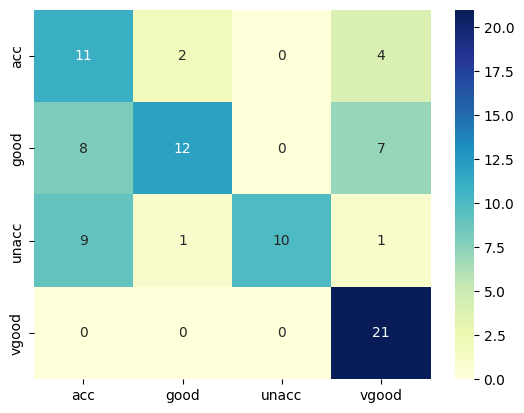

In [33]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [34]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
x =df.drop(['class'],axis=1)
y=df['class']
ran= RandomOverSampler()
x_rs,y_rs=ran.fit_resample(x,y)

In [35]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','persons','lug_boot','safty'])
x_en = encoder.fit_transform(x_rs)

/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [36]:
le =LabelEncoder()
y_en =le.fit_transform(y_rs)

In [37]:
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

In [38]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [39]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.6291 


In [40]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[173 135   0  95]
 [  0 196   0 183]
 [101  40 235  38]
 [  0   0   0 400]]


In [41]:
classes_name =le.classes_.tolist()
classes_name 

['acc', 'good', 'unacc', 'vgood']

In [42]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

,acc,good,unacc,vgood
acc,173,135,0,95
good,0,196,0,183
unacc,101,40,235,38
vgood,0,0,0,400


<Axes: >

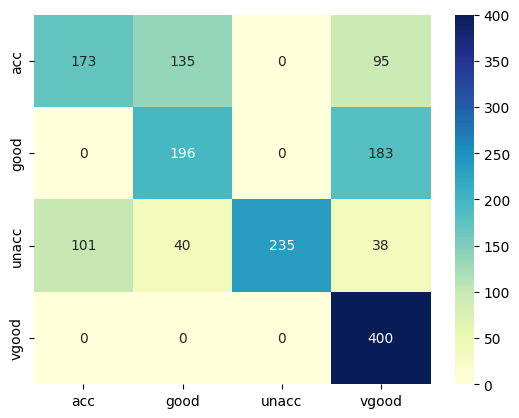

In [43]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [44]:
from imblearn.combine import SMOTEENN
x =df.drop(['class'],axis=1)
y=df['class']
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','persons','lug_boot','safty'])
x_en = encoder.fit_transform(x)

le =LabelEncoder()
y_en =le.fit_transform(y)
ran =SMOTEENN()

x_rs, y_rs=ran.fit_resample(x_en,y_en)



/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [45]:
x_train, x_test, y_train, y_test =train_test_split(x_rs,y_rs,test_size =0.33,random_state =42)

In [46]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [47]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.9266 


In [48]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[112  11  22   7]
 [  0 295   0  27]
 [ 10   0 231   0]
 [  0   0   0 334]]


In [49]:
classes_name =le.classes_.tolist()
classes_name 

['acc', 'good', 'unacc', 'vgood']

In [50]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

,acc,good,unacc,vgood
acc,112,11,22,7
good,0,295,0,27
unacc,10,0,231,0
vgood,0,0,0,334


<Axes: >

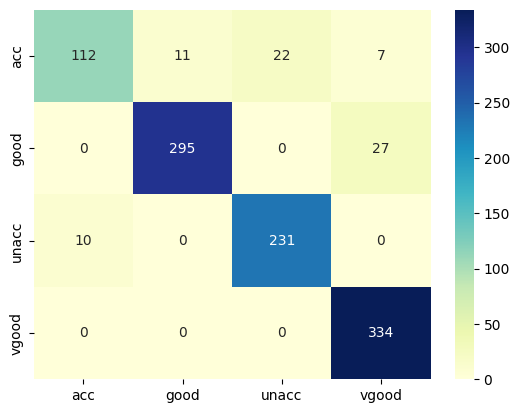

In [51]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [52]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       152
           1       0.96      0.92      0.94       322
           2       0.91      0.96      0.94       241
           3       0.91      1.00      0.95       334

    accuracy                           0.93      1049
   macro avg       0.93      0.90      0.91      1049
weighted avg       0.93      0.93      0.92      1049



# decision tree


[Text(0.4375, 0.9166666666666666, 'x[5] <= 2.5\ngini = 0.73\nsamples = 2129\nvalue = [272, 637, 595, 625]'),
 Text(0.3958333333333333, 0.75, 'x[0] <= 2.5\ngini = 0.7\nsamples = 1746\nvalue = [272, 637, 212, 625]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= 1.5\ngini = 0.495\nsamples = 337\nvalue = [152, 0, 185, 0]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 95\nvalue = [0, 0, 95, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[4] <= 1.5\ngini = 0.467\nsamples = 242\nvalue = [152, 0, 90, 0]'),
 Text(0.08333333333333333, 0.25, 'x[5] <= 1.5\ngini = 0.46\nsamples = 81\nvalue = [29, 0, 52, 0]'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42, 0]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.381\nsamples = 39\nvalue = [29, 0, 10, 0]'),
 Text(0.25, 0.25, 'x[1] <= 2.5\ngini = 0.361\nsamples = 161\nvalue = [123, 0, 38, 0]'),
 Text(0.20833333333333334, 0.08333333333333333, 'gini = 0.5\nsamples = 63\nvalue = [31,

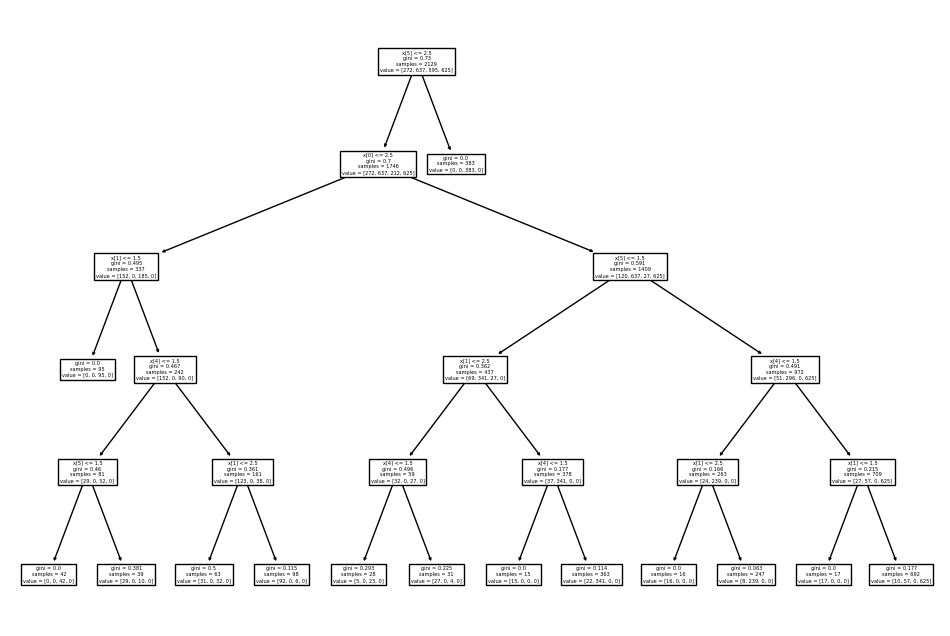

In [53]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [54]:
import graphviz

dot_data= tree.export_graphviz(clf_gini, out_file=None,feature_names=x_train.columns,class_names=classes_name,filled=True, rounded=True,special_characters=True)

graph= graphviz.Source(dot_data)

# HYPER PARAMETER TUNING

In [55]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of random search

params={

'max_depth': [2, 3, 5, 6,8,10, 20],

'min_samples_leaf': [5, 10, 20, 50, 180],

'criterion': ["gini", "entropy"]
}

In [56]:
grid_search = GridSearchCV(estimator=clf_gini, param_grid=params,
                  cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [57]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 180]},
             scoring='accuracy', verbose=1)

In [58]:
best_par = grid_search.best_estimator_

In [63]:
def evaluate_model(dt_classifier):

    print("Train Accuracy:",

          accuracy_score(y_train, dt_classifier.predict(x_train)))

    print("Train Confusion Matrix:")

    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))

    print("-"*50)

    print("Test Accuracy:",

           accuracy_score(y_test, dt_classifier.predict(x_test)))

    print("Test Confusion Matrix:")

    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))

In [60]:
evaluate_model(best_par)

Train Accuracy: 0.9943635509628934
Train Confusion Matrix:
[[266   5   0   1]
 [  0 637   0   0]
 [  6   0 589   0]
 [  0   0   0 625]]
--------------------------------------------------
Test Accuracy: 0.9876072449952336
Test Confusion Matrix:
[[145   5   0   2]
 [  0 322   0   0]
 [  6   0 235   0]
 [  0   0   0 334]]


In [61]:
best_par.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=0)

In [62]:
print("Test Accuracy :",accuracy_score(y_test,best_par.predict(x_test)))

Test Accuracy : 0.9876072449952336


In [64]:
import joblib

#save the model to disk
filename = 'finalized_model.joblib'
joblib.dump(best_par,filename)

['finalized_model.joblib']

In [65]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/kaggle/working/finalized_model.joblib